# 🎯 Import Libraries 🎯

In [91]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
import shap
from google.cloud import bigquery
from IPython.display import display, HTML

## 📋 Import Tables Correctly 📋

In [ ]:
%%bigquery --project lofty-gravity-420212
CREATE OR REPLACE TABLE `lofty-gravity-420212.boya_acoruna.Salinity` AS
WITH numeradas AS (
  SELECT
    string_field_0,
    string_field_1,
    ROW_NUMBER() OVER () AS fila_num
  FROM `lofty-gravity-420212.boya_acoruna.Salinity`
)
SELECT
  string_field_0 AS date_time,
  string_field_1 AS temperature
FROM numeradas
WHERE fila_num > 1
  AND string_field_0 != 'Valor nulo: -9999.9'

Query is running:   0%|          |

""


In [ ]:
%%bigquery --project lofty-gravity-420212
CREATE OR REPLACE TABLE `lofty-gravity-420212.boya_acoruna.Currents` AS
WITH numeradas AS (
  SELECT
    string_field_0,
    string_field_1,
    string_field_2,
    ROW_NUMBER() OVER () AS fila_num
  FROM `lofty-gravity-420212.boya_acoruna.Currents`
)
SELECT
  string_field_0 AS date_time,
  string_field_1 AS average_current_speed_mps,
  string_field_2 AS current_direction
FROM numeradas
WHERE fila_num > 1
  AND string_field_0 != 'Valor nulo: -9999.9'

Query is running:   0%|          |

""


In [ ]:
%%bigquery --project lofty-gravity-420212
CREATE OR REPLACE TABLE `lofty-gravity-420212.boya_acoruna.WaterTemp` AS
WITH tabla_limpia AS (
  SELECT
    string_field_0 AS date_gmt,
    CAST(string_field_1 AS FLOAT64) AS water_temperature_c
  FROM `lofty-gravity-420212.boya_acoruna.WaterTemp`
  WHERE string_field_0 NOT IN ('Valor nulo: -9999.9', 'Fecha (GMT)')
)
SELECT *
FROM tabla_limpia;


Query is running:   0%|          |

""


In [ ]:
%%bigquery --project lofty-gravity-420212
CREATE OR REPLACE TABLE `lofty-gravity-420212.boya_acoruna.Wave` AS
WITH tabla_limpia AS (
  SELECT
    string_field_0 AS date_gmt,
    SAFE_CAST(string_field_1 AS FLOAT64) AS significant_wave_height_m,
    SAFE_CAST(string_field_2 AS FLOAT64) AS mean_period_s,
    SAFE_CAST(string_field_3 AS FLOAT64) AS peak_period_s,
    SAFE_CAST(string_field_4 AS INT64) AS mean_wave_direction
  FROM `lofty-gravity-420212.boya_acoruna.Wave`
  WHERE string_field_0 NOT IN ('Valor nulo: -9999.9', 'Fecha (GMT)')
)
SELECT *
FROM tabla_limpia
WHERE significant_wave_height_m IS NOT NULL;


Query is running:   0%|          |

""


In [ ]:
%%bigquery --project lofty-gravity-420212
CREATE OR REPLACE TABLE `lofty-gravity-420212.boya_acoruna.Wind` AS
WITH numeradas AS (
  SELECT
    string_field_0,
    string_field_1,
    string_field_2,
    ROW_NUMBER() OVER () AS fila_num
  FROM `lofty-gravity-420212.boya_acoruna.Wind`
)
SELECT
  string_field_0 AS date_time,
  string_field_1 AS wind_speed_mps,
  string_field_2 AS wind_direction
FROM numeradas
WHERE fila_num > 1
  AND string_field_0 != 'Valor nulo: -9999.9'


Query is running:   0%|          |

""


## 📕 Format all of the tables correctly 📕

In [ ]:
%%bigquery --project lofty-gravity-420212
CREATE OR REPLACE TABLE `lofty-gravity-420212.boya_acoruna.Currents` AS
SELECT
  PARSE_DATETIME('%Y %m %d %H', date_time) AS date_time,
  CAST(average_current_speed_mps AS FLOAT64) AS average_current_speed_mps,
  CAST(current_direction AS FLOAT64) AS current_direction
FROM `lofty-gravity-420212.boya_acoruna.Currents`
WHERE SAFE.PARSE_DATETIME('%Y %m %d %H', date_time) IS NOT NULL;


Query is running:   0%|          |

""


In [ ]:
%%bigquery --project lofty-gravity-420212
CREATE OR REPLACE TABLE `lofty-gravity-420212.boya_acoruna.Salinity` AS
SELECT
  PARSE_DATETIME('%Y %m %d %H', date_time) AS date_time,
  CAST(temperature AS FLOAT64) AS salinity,
FROM `lofty-gravity-420212.boya_acoruna.Salinity`
WHERE SAFE.PARSE_DATETIME('%Y %m %d %H', date_time) IS NOT NULL;


Query is running:   0%|          |

""


In [ ]:
%%bigquery --project lofty-gravity-420212
CREATE OR REPLACE TABLE `lofty-gravity-420212.boya_acoruna.WaterTemp` AS
SELECT
  PARSE_DATETIME('%Y %m %d %H', date_gmt) AS date_time,
  CAST(water_temperature_c AS FLOAT64) AS water_temperature_c
FROM `lofty-gravity-420212.boya_acoruna.WaterTemp`
WHERE SAFE.PARSE_DATETIME('%Y %m %d %H', date_gmt) IS NOT NULL;


Query is running:   0%|          |

""


In [ ]:
%%bigquery --project lofty-gravity-420212
CREATE OR REPLACE TABLE `lofty-gravity-420212.boya_acoruna.Wave` AS
SELECT
  PARSE_DATETIME('%Y %m %d %H', date_gmt) AS date_time,
  CAST(significant_wave_height_m AS FLOAT64) AS significant_wave_height_m,
  CAST(mean_period_s AS FLOAT64) AS mean_period_s,
  CAST(peak_period_s AS FLOAT64) AS peak_period_s,
  CAST(mean_wave_direction AS INT64) AS mean_wave_direction
FROM `lofty-gravity-420212.boya_acoruna.Wave`
WHERE SAFE.PARSE_DATETIME('%Y %m %d %H', date_gmt) IS NOT NULL;


Query is running:   0%|          |

""


In [ ]:
%%bigquery --project lofty-gravity-420212
CREATE OR REPLACE TABLE `lofty-gravity-420212.boya_acoruna.Wind` AS
SELECT
  PARSE_DATETIME('%Y %m %d %H', date_time) AS date_time,
  CAST(wind_speed_mps AS FLOAT64) AS wind_speed_mps,
  CAST(wind_direction AS FLOAT64) AS wind_direction
FROM `lofty-gravity-420212.boya_acoruna.Wind`
WHERE SAFE.PARSE_DATETIME('%Y %m %d %H', date_time) IS NOT NULL;


Query is running:   0%|          |

""


## 🗃️ Structuring our Relational Base Into One Table 🗃️

In [ ]:
%%bigquery --project lofty-gravity-420212
CREATE OR REPLACE TABLE `lofty-gravity-420212.boya_acoruna.BoyaAll` AS
WITH c AS (
  SELECT date_time, average_current_speed_mps, current_direction
  FROM (
    SELECT
      *,
      ROW_NUMBER() OVER (PARTITION BY date_time ORDER BY date_time) AS rn
    FROM `lofty-gravity-420212.boya_acoruna.Currents`
  )
  WHERE rn = 1
),
s AS (
  SELECT date_time, salinity
  FROM (
    SELECT
      *,
      ROW_NUMBER() OVER (PARTITION BY date_time ORDER BY date_time) AS rn
    FROM `lofty-gravity-420212.boya_acoruna.Salinity`
  )
  WHERE rn = 1
),
wt AS (
  SELECT date_time, water_temperature_c
  FROM (
    SELECT
      *,
      ROW_NUMBER() OVER (PARTITION BY date_time ORDER BY date_time) AS rn
    FROM `lofty-gravity-420212.boya_acoruna.WaterTemp`
  )
  WHERE rn = 1
),
wv AS (
  SELECT date_time, significant_wave_height_m, mean_period_s, peak_period_s, mean_wave_direction
  FROM (
    SELECT
      *,
      ROW_NUMBER() OVER (PARTITION BY date_time ORDER BY date_time) AS rn
    FROM `lofty-gravity-420212.boya_acoruna.Wave`
  )
  WHERE rn = 1
),
wi AS (
  SELECT date_time, wind_speed_mps, wind_direction
  FROM (
    SELECT
      *,
      ROW_NUMBER() OVER (PARTITION BY date_time ORDER BY date_time) AS rn
    FROM `lofty-gravity-420212.boya_acoruna.Wind`
  )
  WHERE rn = 1
)
SELECT
  c.date_time,
  c.average_current_speed_mps,
  c.current_direction,
  s.salinity,
  wt.water_temperature_c,
  wv.significant_wave_height_m,
  wv.mean_period_s,
  wv.peak_period_s,
  wv.mean_wave_direction,
  wi.wind_speed_mps,
  wi.wind_direction
FROM c
INNER JOIN s USING (date_time)
INNER JOIN wt USING (date_time)
INNER JOIN wv USING (date_time)
INNER JOIN wi USING (date_time);


Query is running:   0%|          |

""


### Create the Dataframe to Allow Operations in Python Environment

In [ ]:
%%bigquery df --project lofty-gravity-420212
SELECT *
FROM `lofty-gravity-420212.boya_acoruna.BoyaAll`


Query is running:   0%|          |

Downloading:   0%|          |

# 📂 Load and Explore Data 📂
Here, we load the dataset and get some insights. We'll check for missing values, data types, and ensure everything is correct.

In [ ]:
# Inspecting the data
print("Data Overview:\n")
print(df.head())
print("\nData Info:\n")
print(df.info())
print("\nMissing Values:\n")
print(df.isnull().sum())

Data Overview:

            date_time  average_current_speed_mps  current_direction  salinity  \
0 2024-04-23 12:00:00                      0.200             236.30    35.432   
1 2024-09-23 21:00:00                      0.026              42.13    35.387   
2 2024-06-12 13:00:00                      0.121             264.55    35.534   
3 2024-06-12 14:00:00                      0.138             230.90    35.536   
4 2024-06-12 15:00:00                      0.189             216.75    35.533   

   water_temperature_c  significant_wave_height_m  mean_period_s  \
0               13.644                       0.82            3.2   
1               15.912                       0.81            4.0   
2               14.483                       1.14            4.0   
3               14.614                       1.24            4.0   
4               14.430                       1.29            4.0   

   peak_period_s  mean_wave_direction  wind_speed_mps  wind_direction  
0            3.5

In [ ]:
# Descriptive statistics
print(df.describe())

                        date_time  average_current_speed_mps  \
count                        8784                8784.000000   
mean   2024-06-15 01:29:50.163934                   0.137951   
min           2023-12-15 00:00:00                   0.001000   
25%           2024-03-15 11:45:00                   0.071000   
50%           2024-06-14 23:30:00                   0.120000   
75%           2024-09-14 11:15:00                   0.186000   
max           2024-12-15 23:00:00                   0.612000   
std                           NaN                   0.088253   

       current_direction     salinity  water_temperature_c  \
count        8784.000000  8784.000000          8784.000000   
mean          163.244307    35.154124            15.596982   
min             0.000000    34.231000            12.860000   
25%            71.170000    34.991000            14.375000   
50%           136.020000    35.180000            15.347000   
75%           265.202500    35.386000            16

### We have no null values so we don't need to fill any missing values

# 📊 Visualize Data Distributions 📊
Before diving into modeling, it's important to understand the distributions of our data using histograms to get more insights.

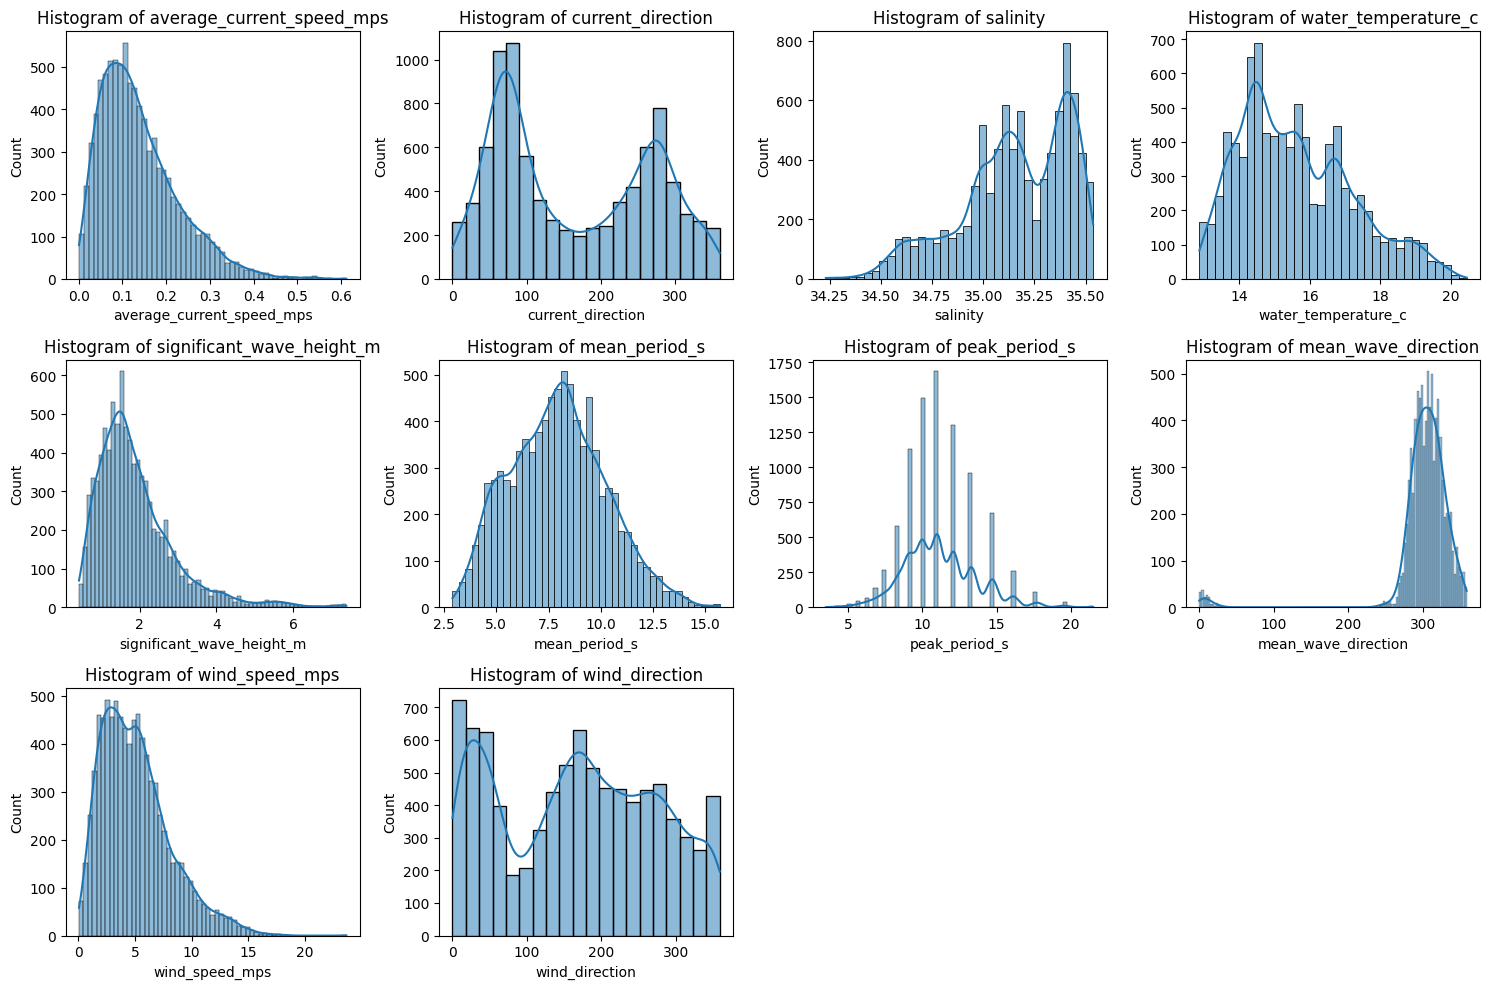

In [ ]:
num_columns = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_columns):
    plt.subplot((len(num_columns) + 3) // 4, 4, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.tight_layout()
plt.show()

# 🔗 Correlation Matrix 🔗
We'll calculate and visualize the correlation matrix to identify relationships between features. Based on our correlations we can choose which variable would be the best to predict.



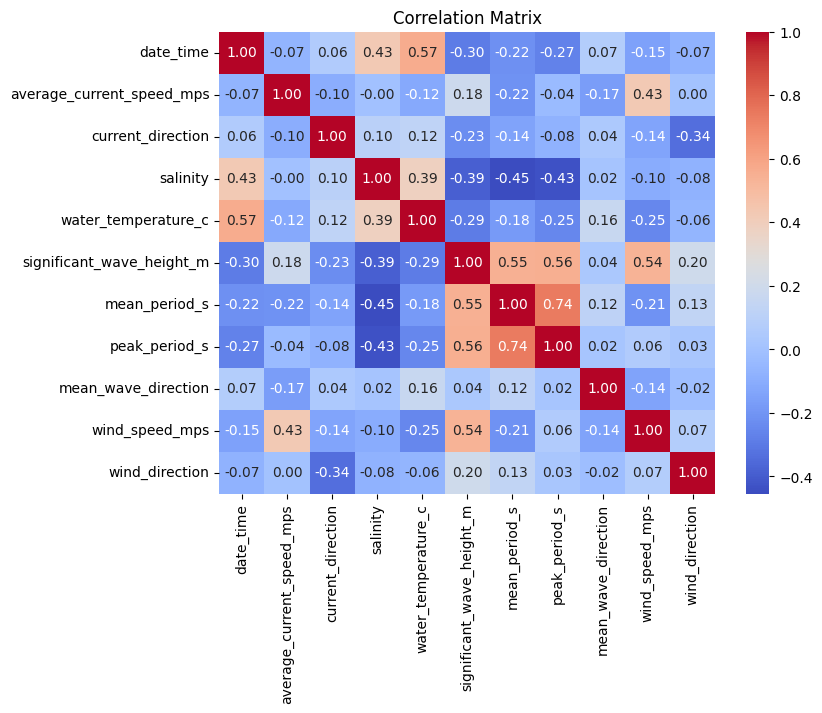

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 🧹 Preprocess Data 🧹
Preprocessing is key! We'll scale features, and split the data into training and testing sets for our models.

In [ ]:
# Define Features and Target
feature_names = df.drop(columns=['significant_wave_height_m', 'date_time'], errors='ignore').columns
X = df.drop(columns=['significant_wave_height_m', 'date_time'], errors='ignore')
y = df['significant_wave_height_m']

# Standardize the data with the scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 🤖 Model Training and Evaluation 🤖
We'll train multiple machine learning models, evaluate their performance, and compare their results. After this we will choose which model is the best and make more complex parameters to get a better prediction.

In [ ]:
# Function to evaluate models and get the evalution metrics
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2 = r2_score(y_test, y_pred_test)

    return train_rmse, test_rmse, r2

In [ ]:
### Model 1: Linear Regression
lr_model = LinearRegression()
lr_train_rmse, lr_test_rmse, lr_r2 = evaluate_model(lr_model, X_train, y_train, X_test, y_test)

print("\nLinear Regression Results:")
print(f"Train RMSE: {lr_train_rmse:.4f}, Test RMSE: {lr_test_rmse:.4f}, R^2: {lr_r2:.4f}")



Linear Regression Results:
Train RMSE: 0.5065, Test RMSE: 0.4991, R^2: 0.7588


In [ ]:
### Model 2: Ridge Regression (Regularized Linear Regression)
ridge_model = Ridge(alpha=1.0)
ridge_train_rmse, ridge_test_rmse, ridge_r2 = evaluate_model(ridge_model, X_train, y_train, X_test, y_test)

print("\nRidge Regression Results:")
print(f"Train RMSE: {ridge_train_rmse:.4f}, Test RMSE: {ridge_test_rmse:.4f}, R^2: {ridge_r2:.4f}")



Ridge Regression Results:
Train RMSE: 0.5065, Test RMSE: 0.4991, R^2: 0.7588


In [ ]:
### Model 3: Lasso Regression
lasso_model = Lasso(alpha=0.01)
lasso_train_rmse, lasso_test_rmse, lasso_r2 = evaluate_model(lasso_model, X_train, y_train, X_test, y_test)

print("\nLasso Regression Results:")
print(f"Train RMSE: {lasso_train_rmse:.4f}, Test RMSE: {lasso_test_rmse:.4f}, R^2: {lasso_r2:.4f}")

# Identify Features Kept and Omitted by Lasso Regression model
lasso_coefficients = pd.Series(lasso_model.coef_, index=df.drop(columns=['significant_wave_height_m', 'date_time'], errors='ignore').columns)
kept_features = lasso_coefficients[lasso_coefficients != 0].index.tolist()
omitted_features = lasso_coefficients[lasso_coefficients == 0].index.tolist()

print("\nFeatures Kept by Lasso Regression:")
print(kept_features)
print("\nFeatures Omitted by Lasso Regression:")
print(omitted_features)


Lasso Regression Results:
Train RMSE: 0.5070, Test RMSE: 0.5002, R^2: 0.7578

Features Kept by Lasso Regression:
['average_current_speed_mps', 'current_direction', 'mean_period_s', 'peak_period_s', 'mean_wave_direction', 'wind_speed_mps', 'wind_direction']

Features Omitted by Lasso Regression:
['salinity', 'water_temperature_c']


In [ ]:
### Model 4: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_train_rmse, rf_test_rmse, rf_r2 = evaluate_model(rf_model, X_train, y_train, X_test, y_test)

print("\nRandom Forest Results:")
print(f"Train RMSE: {rf_train_rmse:.4f}, Test RMSE: {rf_test_rmse:.4f}, R^2: {rf_r2:.4f}")



Random Forest Results:
Train RMSE: 0.2139, Test RMSE: 0.3023, R^2: 0.9115


In [ ]:
### Model 5: XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6)
xgb_train_rmse, xgb_test_rmse, xgb_r2 = evaluate_model(xgb_model, X_train, y_train, X_test, y_test)

print("\nXGBoost Results:")
print(f"Train RMSE: {xgb_train_rmse:.4f}, Test RMSE: {xgb_test_rmse:.4f}, R^2: {xgb_r2:.4f}")



XGBoost Results:
Train RMSE: 0.1897, Test RMSE: 0.2752, R^2: 0.9266


In [ ]:
### Model 6: Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
y_pred_poly = poly_model.predict(X_poly_test)

poly_rmse = np.sqrt(mean_squared_error(y_test, y_pred_poly))
poly_r2 = r2_score(y_test, y_pred_poly)

print("\nPolynomial Regression Results:")
print(f"Test RMSE: {poly_rmse:.4f}, R^2: {poly_r2:.4f}")



Polynomial Regression Results:
Test RMSE: 0.4247, R^2: 0.8254


#### Compare all of the models to identify the hhighest performer

In [ ]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression", "Random Forest", "XGBoost", "Polynomial Regression"],
    "Train RMSE": [lr_train_rmse, ridge_train_rmse, lasso_train_rmse, rf_train_rmse, xgb_train_rmse, "N/A"],
    "Test RMSE": [lr_test_rmse, ridge_test_rmse, lasso_test_rmse, rf_test_rmse, xgb_test_rmse, poly_rmse],
    "R^2": [lr_r2, ridge_r2, lasso_r2, rf_r2, xgb_r2, poly_r2]
})

print("\nModel Performance Comparison:")
print(results)


Model Performance Comparison:
                   Model Train RMSE  Test RMSE       R^2
0      Linear Regression   0.506491   0.499066  0.758828
1       Ridge Regression   0.506491   0.499074  0.758820
2       Lasso Regression   0.507018   0.500151  0.757778
3          Random Forest   0.213899   0.302263  0.911533
4                XGBoost   0.189743   0.275249  0.926639
5  Polynomial Regression        N/A   0.424685  0.825359


# AutoML

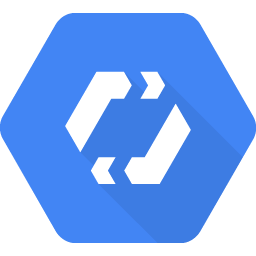

## 📊 Splitting the Data into Train and Test Sets 📊
In this step, we split the data into train (80%) and test (20%) datasets.

Train Data: Used to train the machine learning model.

Test Data: Used to evaluate the performance of the trained model.

In [80]:
%%bigquery --project lofty-gravity-420212
CREATE OR REPLACE TABLE `lofty-gravity-420212.boya_acoruna.train_data` AS
SELECT *
FROM `lofty-gravity-420212.boya_acoruna.BoyaAll`
WHERE RAND() < 0.8;

CREATE OR REPLACE TABLE `lofty-gravity-420212.boya_acoruna.test_data` AS
SELECT *
FROM `lofty-gravity-420212.boya_acoruna.BoyaAll`
WHERE RAND() >= 0.8;


Query is running:   0%|          |

""


## 🤖 Training the AutoML Model 🤖
Here, we use BigQuery ML to create an AutoML Regression Model.

The model learns from the train_data table.

The target column is significant_wave_height_m.

This model will serve as our baseline to see if we can create a better model than google's AutoML

In [81]:
%%bigquery --project lofty-gravity-420212
CREATE OR REPLACE MODEL `lofty-gravity-420212.boya_acoruna.automl_model`
OPTIONS(
  model_type = 'automl_regressor',
  input_label_cols = ['significant_wave_height_m'],
  budget_hours = 1
) AS
SELECT *
FROM `lofty-gravity-420212.boya_acoruna.train_data`;



Query is running:   0%|          |

""


## 📊 Evaluating the Model on Test Data 📊
We use the ML.EVALUATE function to assess the model's performance on the test_data table.
This step calculates metrics such as:

RMSE (Root Mean Squared Error)
R² (Coefficient of Determination)
MAE (Mean Absolute Error)

In [82]:
%%bigquery --project lofty-gravity-420212
SELECT *
FROM ML.EVALUATE(
  MODEL `lofty-gravity-420212.boya_acoruna.automl_model`,
  (SELECT * FROM `lofty-gravity-420212.boya_acoruna.test_data`)
);


Query is running:   0%|          |

Downloading:   0%|          |

,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score,explained_variance
0,0.753781,0.798625,0.106143,0.6338,0.196255,0.768033


## 🔮 Making Predictions on Test Data 🔮
The ML.PREDICT function generates predictions for the test_data table using the trained AutoML model.

It adds a column with the predicted values of significant_wave_height_m to see how good the predictions were.

In [94]:
client = bigquery.Client(project="lofty-gravity-420212")
query = """
SELECT *
FROM ML.PREDICT(
  MODEL `lofty-gravity-420212.boya_acoruna.automl_model`,
  (SELECT * FROM `lofty-gravity-420212.boya_acoruna.test_data`)
);
"""

query_job = client.query(query)
autoML = query_job.to_dataframe()

display(HTML(autoML.to_html(max_rows=15, max_cols=12)))

,predicted_significant_wave_height_m,date_time,average_current_speed_mps,current_direction,salinity,water_temperature_c,significant_wave_height_m,mean_period_s,peak_period_s,mean_wave_direction,wind_speed_mps,wind_direction
0,0.416410,2024-05-22 01:00:00,0.074,148.35,35.086,15.167,0.81,4.0,5.1,287,5.18,198.0
1,1.074170,2024-07-02 16:00:00,0.336,229.03,35.499,14.996,1.72,4.5,5.1,345,10.34,10.0
2,0.344512,2024-05-21 21:00:00,0.113,121.62,35.084,15.188,0.66,4.6,5.1,301,4.11,165.0
3,0.317959,2024-05-21 20:00:00,0.079,121.07,35.086,15.202,0.69,4.6,4.7,302,3.38,150.0
4,0.478216,2024-06-21 20:00:00,0.031,338.36,35.397,16.929,0.96,3.7,4.2,295,6.65,261.0
5,0.691403,2024-05-31 20:00:00,0.292,272.82,35.263,14.997,1.45,4.5,7.5,6,8.57,53.0
6,0.872615,2024-06-01 19:00:00,0.264,272.95,35.373,14.106,1.49,4.5,7.5,10,9.33,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1722,0.401151,2024-06-22 00:00:00,0.117,106.73,35.395,16.743,0.82,4.8,6.2,301,3.97,224.0
1723,0.382911,2024-09-09 05:00:00,0.211,92.16,35.074,17.421,0.77,5.8,6.2,322,1.83,138.0


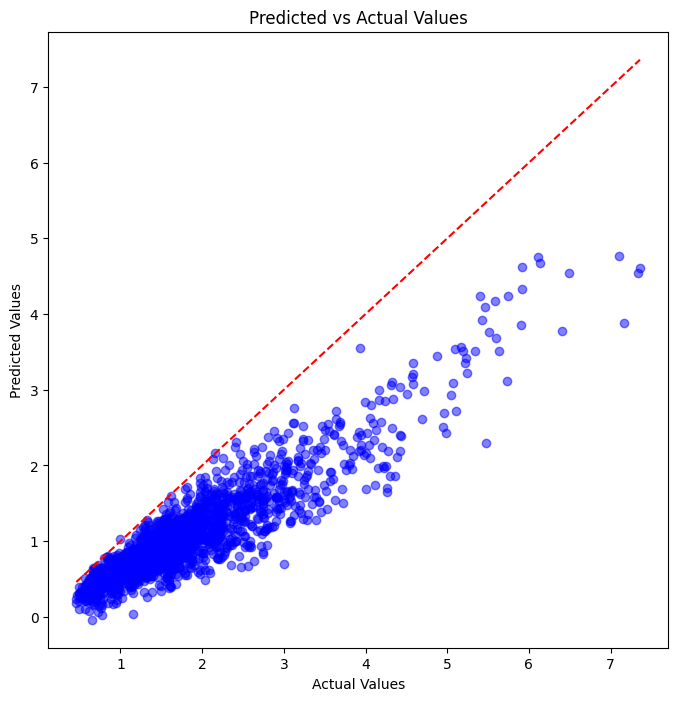

In [100]:
actual = autoML['significant_wave_height_m']
predicted = autoML['predicted_significant_wave_height_m']
plt.figure(figsize=(8, 8))
plt.scatter(actual, predicted, color="blue", alpha=0.5)
x = np.linspace(min(actual), max(actual), 100)
plt.plot(x, x, color="red", linestyle="--")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.show()

#### When comparing the columns of the predicted with the actual wave height we can see that the AutoML model does not work very well. There is a large deviation between predicted and actual values. Given the graph above we see that there is a large amount of under fitting. The deviation in predicted increases as the waves get larger indicates that the model is not showing the underlying pattern. Although there was a high R2 value in the train data (94%) it struggles greatly to predict actual values on unseen data.

# ⚖️ Comparing Models ⚖️
Now it's time to compare the performance of our 6 different models.
We'll visualize the results of each model based on metrics like RMSE and R² to determine the best-performing model. This helps us understand which approach works best for our data and which one is the best.



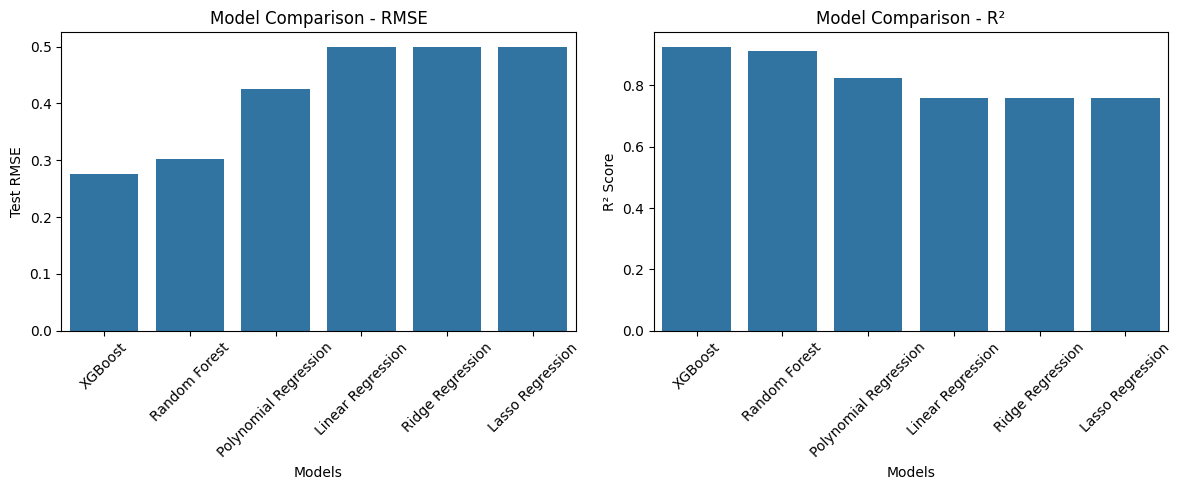

In [ ]:
# Sort results by Test RMSE (ascending, lower is better)
results_sorted_rmse = results.sort_values(by="Test RMSE", ascending=True)

# Sort results by R² (descending, higher is better)
results_sorted_r2 = results.sort_values(by="R^2", ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# RMSE Plot
sns.barplot(x="Model", y="Test RMSE", data=results_sorted_rmse, ax=axes[0])
axes[0].set_title("Model Comparison - RMSE")
axes[0].set_xlabel("Models")
axes[0].set_ylabel("Test RMSE")
axes[0].tick_params(axis='x', rotation=45)

# R² Plot
sns.barplot(x="Model", y="R^2", data=results_sorted_r2, ax=axes[1])
axes[1].set_title("Model Comparison - R²")
axes[1].set_xlabel("Models")
axes[1].set_ylabel("R² Score")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# 🔍 Feature Importance 🔍
Understanding which features contribute most to our model is crucial.
We'll use the feature importance scores from the trained model to visualize and identify the most impactful features driving the predictions. This helps us interpret the model and refine it in the next steps.

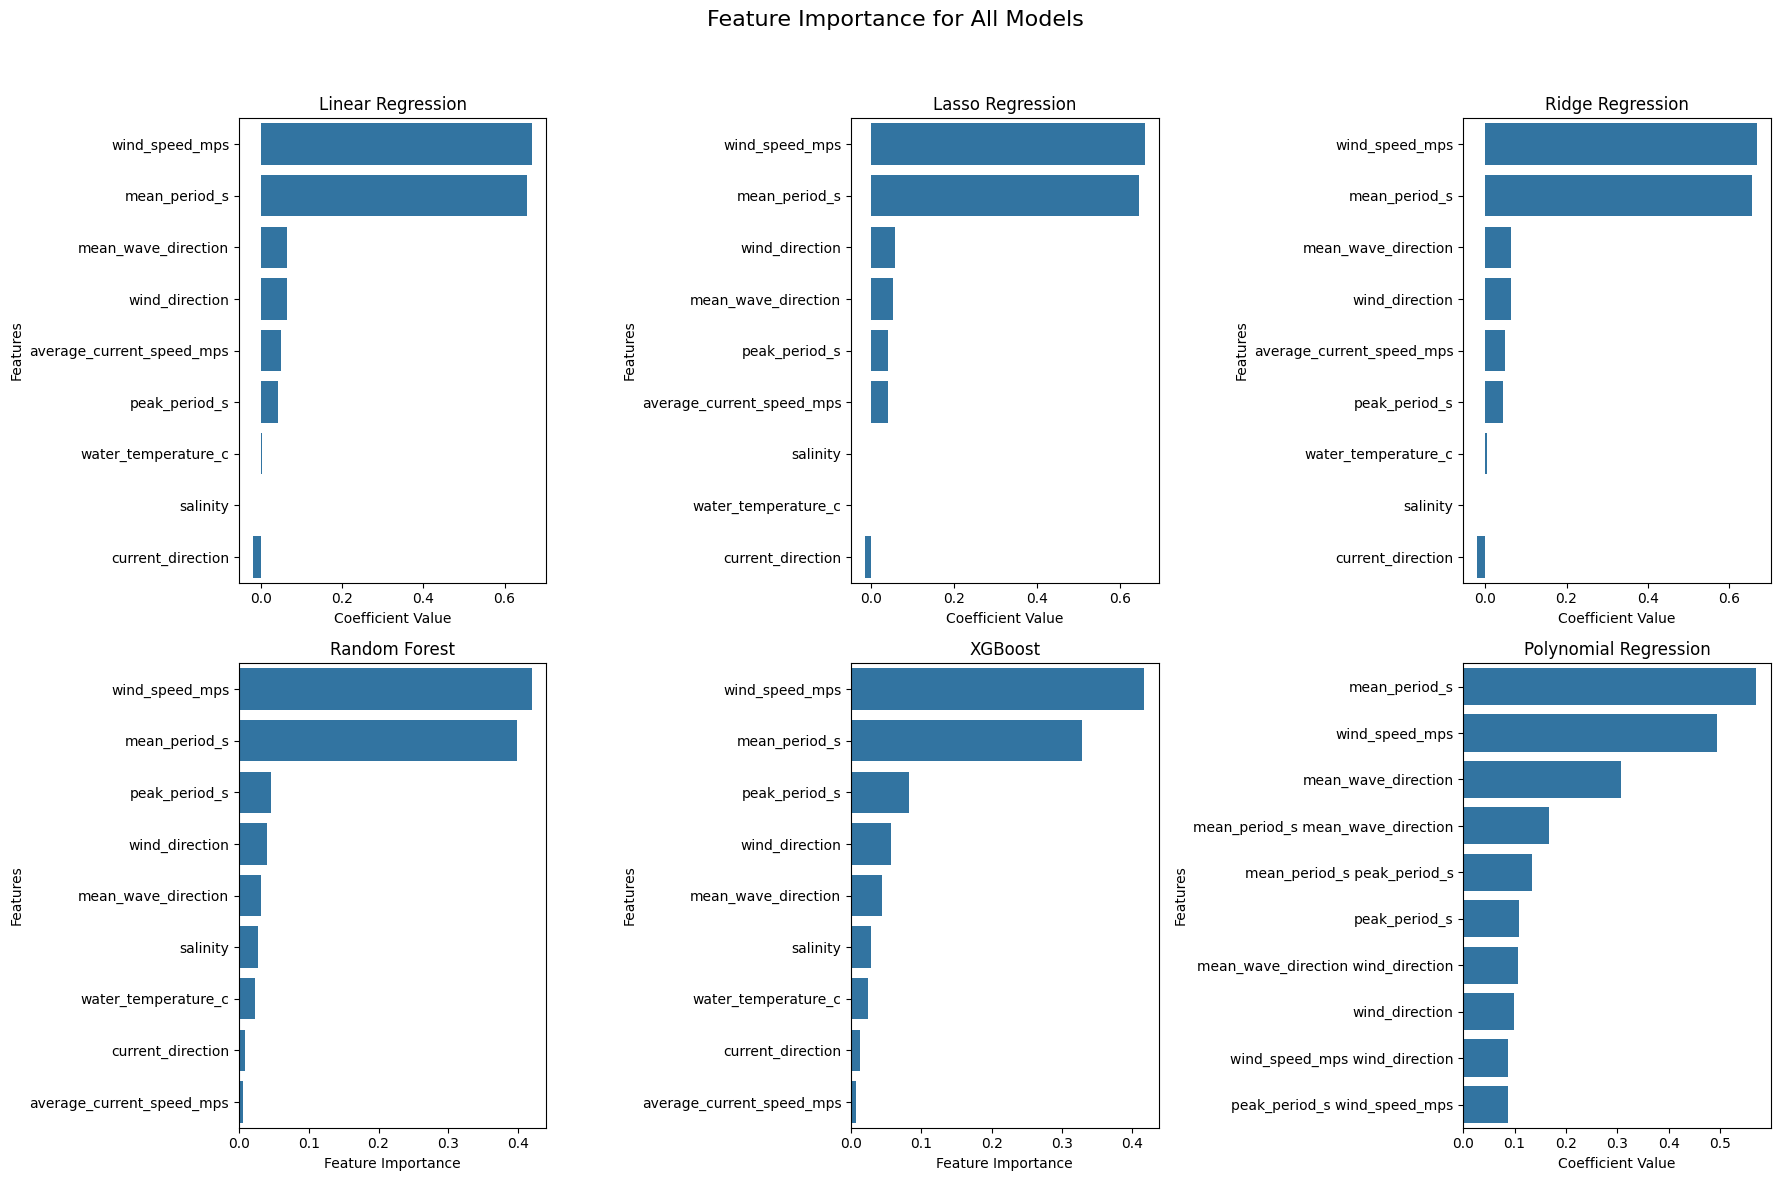

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("Feature Importance for All Models", fontsize=16)

# 1. Linear Regression Importance
lr_importances = pd.Series(lr_model.coef_, index=df.drop(columns=['significant_wave_height_m', 'date_time'], errors='ignore').columns)
lr_importances = lr_importances.sort_values(ascending=False)
sns.barplot(x=lr_importances, y=lr_importances.index, ax=axes[0, 0])
axes[0, 0].set_title("Linear Regression")
axes[0, 0].set_xlabel("Coefficient Value")
axes[0, 0].set_ylabel("Features")

# 2. Lasso Feature Importance
lasso_importances = pd.Series(lasso_model.coef_, index=df.drop(columns=['significant_wave_height_m', 'date_time'], errors='ignore').columns)
lasso_importances = lasso_importances.sort_values(ascending=False)
sns.barplot(x=lasso_importances, y=lasso_importances.index, ax=axes[0, 1])
axes[0, 1].set_title("Lasso Regression")
axes[0, 1].set_xlabel("Coefficient Value")
axes[0, 1].set_ylabel("Features")

# 3. Ridge Feature Importance
ridge_importances = pd.Series(ridge_model.coef_, index=df.drop(columns=['significant_wave_height_m', 'date_time'], errors='ignore').columns)
ridge_importances = ridge_importances.sort_values(ascending=False)
sns.barplot(x=ridge_importances, y=ridge_importances.index, ax=axes[0, 2])
axes[0, 2].set_title("Ridge Regression")
axes[0, 2].set_xlabel("Coefficient Value")
axes[0, 2].set_ylabel("Features")

# 4. Random Forest Feature Importance
rf_importances = pd.Series(rf_model.feature_importances_, index=df.drop(columns=['significant_wave_height_m', 'date_time'], errors='ignore').columns)
rf_importances = rf_importances.sort_values(ascending=False)
sns.barplot(x=rf_importances, y=rf_importances.index, ax=axes[1, 0])
axes[1, 0].set_title("Random Forest")
axes[1, 0].set_xlabel("Feature Importance")
axes[1, 0].set_ylabel("Features")

# 5. XGBoost Feature Importance
xgb_importances = pd.Series(xgb_model.feature_importances_, index=df.drop(columns=['significant_wave_height_m', 'date_time'], errors='ignore').columns)
xgb_importances = xgb_importances.sort_values(ascending=False)
sns.barplot(x=xgb_importances, y=xgb_importances.index, ax=axes[1, 1])
axes[1, 1].set_title("XGBoost")
axes[1, 1].set_xlabel("Feature Importance")
axes[1, 1].set_ylabel("Features")

# 6. Polynomial Regression Feature Importance
poly_feature_names = poly.get_feature_names_out(df.drop(columns=['significant_wave_height_m', 'date_time'], errors='ignore').columns)
poly_coefficients = pd.Series(np.abs(poly_model.coef_[1:]), index=poly_feature_names[1:])
poly_importances = poly_coefficients.sort_values(ascending=False).head(10)
sns.barplot(x=poly_importances, y=poly_importances.index, ax=axes[1, 2])
axes[1, 2].set_title("Polynomial Regression")
axes[1, 2].set_xlabel("Coefficient Value")
axes[1, 2].set_ylabel("Features")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 🌟 Hyperparameter Tuning 🌟
Let's optimize our best model (xgboost) by performing hyperparameter tuning using RandomizedSearchCV. This will help to perfect the models and make adjustments where necessary to better our predictions

In [78]:
# Set the parameters
param_grid = {
    'n_estimators': [150, 200, 250, 300, 350],
    'learning_rate': [0.05, 0.1, 0.15, 0.2],
    'max_depth': [7, 8, 9, 10],
    'subsample': [0.85, 0.9, 0.95],
    'colsample_bytree': [0.8, 0.85, 0.9, 0.95],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0.2, 0.3, 0.4, 0.5],
    'reg_lambda': [15, 20, 25, 30],
    'min_child_weight': [1, 2, 3]
}

# Initialize XGBoost Regressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# RandomizedSearchCV for Hyperparameter Tuning
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=30,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the Randomized Search to the model
print("Performing Randomized Search...")
random_search.fit(X_train, y_train)

# Best Parameters based on squared error
best_params = random_search.best_params_
print("\nBest Hyperparameters for XGBoost (Final):")
print(best_params)

# Train Final XGBoost Model
final_xgb_model = XGBRegressor(**best_params, objective='reg:squarederror', random_state=42)

print("\nTraining Final XGBoost Model...")
final_xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

# Evaluate the final model on the test set
final_xgb_train_rmse, final_xgb_test_rmse, final_xgb_r2 = evaluate_model(
    final_xgb_model, X_train, y_train, X_test, y_test
)

# Results
print("\nFinal XGBoost Results:")
print(f"Train RMSE: {final_xgb_train_rmse:.4f}, Test RMSE: {final_xgb_test_rmse:.4f}, R²: {final_xgb_r2:.4f}")


Performing Randomized Search...
Fitting 5 folds for each of 30 candidates, totalling 150 fits

Best Hyperparameters for XGBoost (Final):
{'subsample': 0.95, 'reg_lambda': 30, 'reg_alpha': 0.4, 'n_estimators': 350, 'min_child_weight': 3, 'max_depth': 10, 'learning_rate': 0.15, 'gamma': 0, 'colsample_bytree': 0.95}

Training Final XGBoost Model...

Final XGBoost Results:
Train RMSE: 3.6738, Test RMSE: 14.3574, R²: 0.9528


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


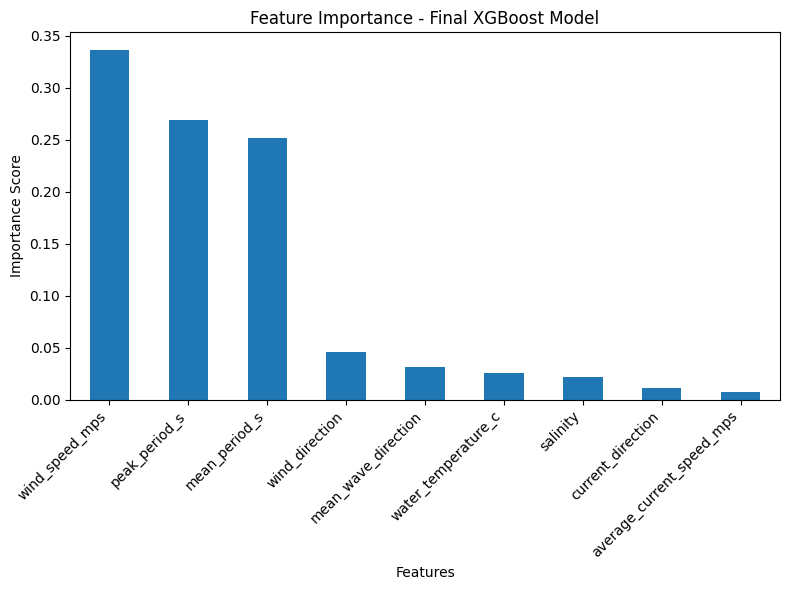

In [ ]:
# Feature Importance of the Final XGBoost model
feature_importance = pd.Series(final_xgb_model.feature_importances_, index=feature_names)
feature_importance = feature_importance.sort_values(ascending=False)

# Plot Feature Importance for visual interpretation
plt.figure(figsize=(8, 6))
feature_importance.plot(kind='bar')
plt.title("Feature Importance - Final XGBoost Model")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


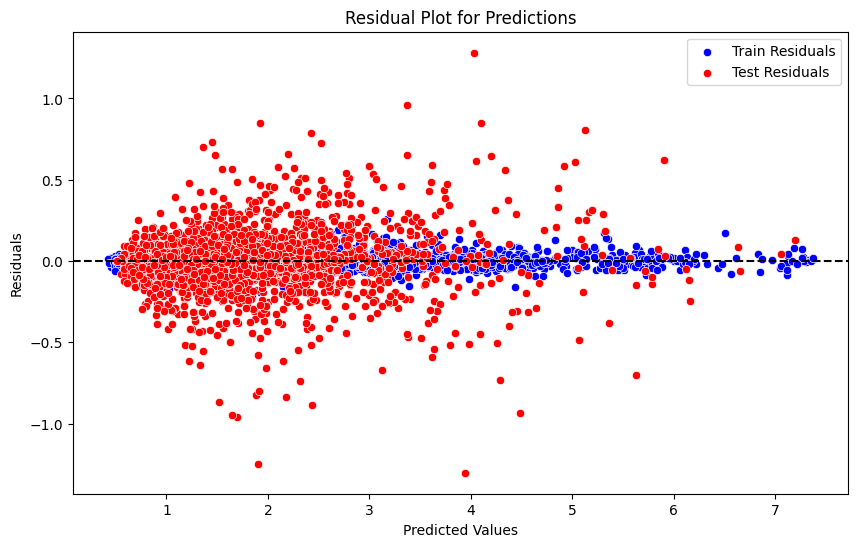

In [ ]:
# Calculate residuals to plot
y_train_pred = final_xgb_model.predict(X_train)
y_test_pred = final_xgb_model.predict(X_test)
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train_pred, y=train_residuals, color='blue', label='Train Residuals')
sns.scatterplot(x=y_test_pred, y=test_residuals, color='red', label='Test Residuals')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Predictions')
plt.legend()
plt.show()

#### Plot the predicted vs actual values

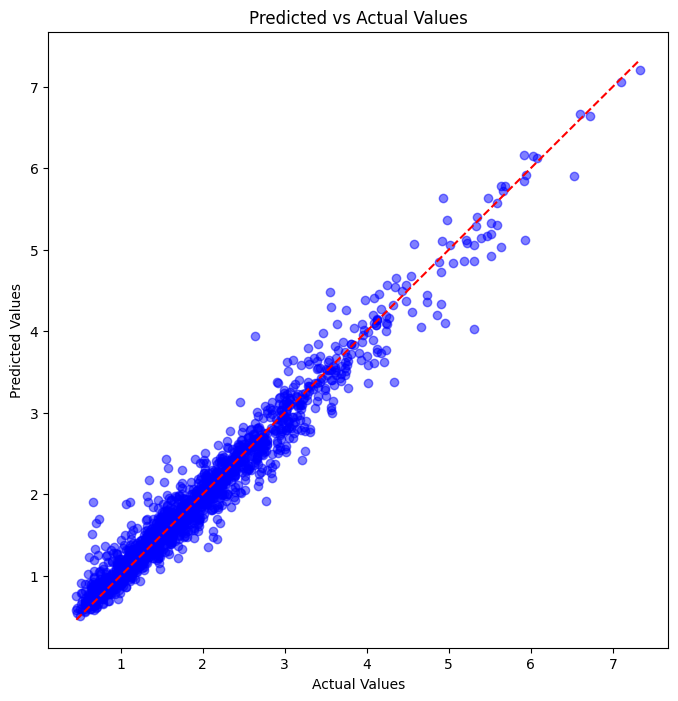

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_test_pred, color="blue", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.show()

#### Plot the learning curve of both the train and test data

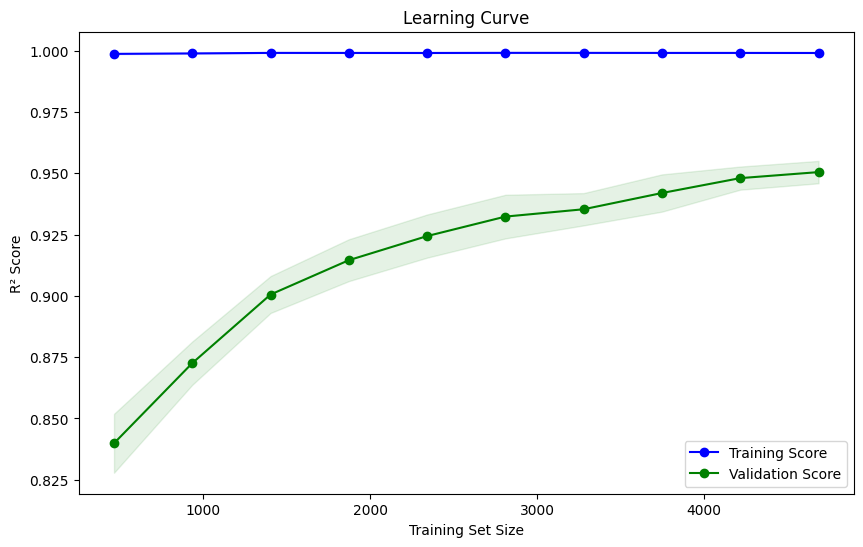

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    final_xgb_model, X_train, y_train, cv=3, scoring="r2", n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color="blue", marker="o", label="Training Score")
plt.plot(train_sizes, test_mean, color="green", marker="o", label="Validation Score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="green")
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.legend()
plt.show()


#### Create the shap plot to see the feature importance and the levels of each feature

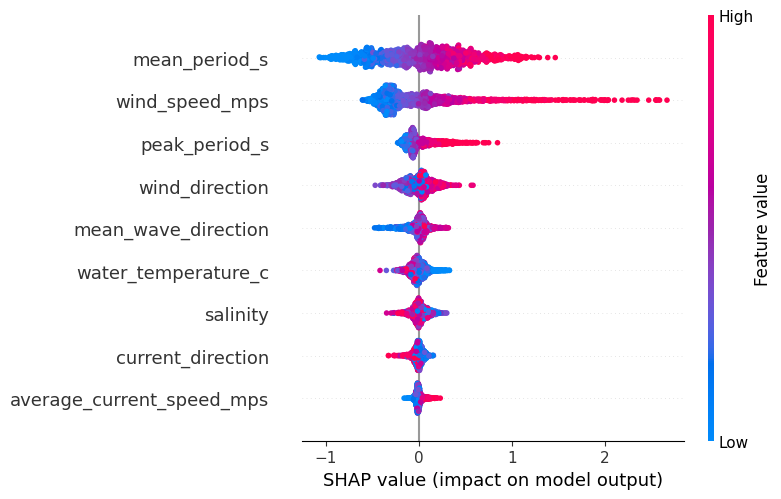

In [ ]:
explainer = shap.Explainer(final_xgb_model)
shap_values = explainer(X_test)

# Summary plot for SHAP values
shap.summary_plot(shap_values, X_test, feature_names=feature_names)


#### Plot the distribution of the prediction errors

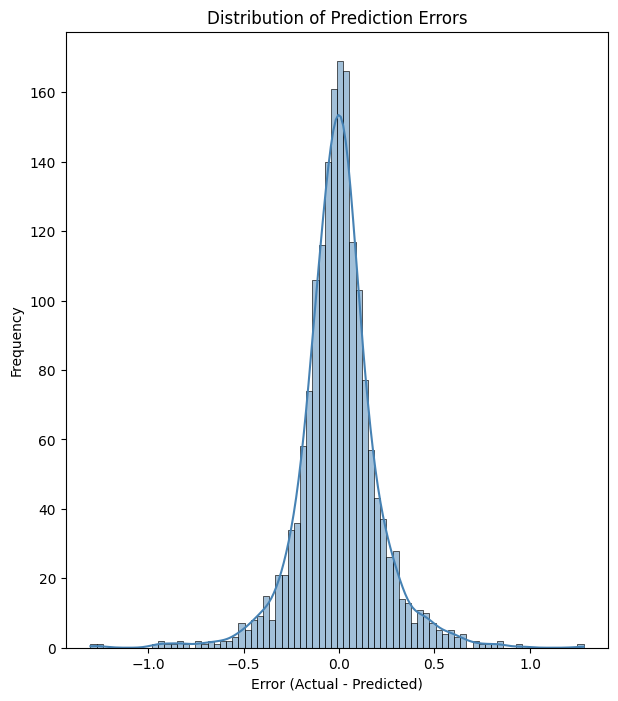

In [ ]:
errors = y_test - y_test_pred

plt.figure(figsize=(7, 8))
sns.histplot(errors, kde=True, color="#4682b4")
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()


# 🏁 Conclusion 🏁

After creating all of our models and getting our final XGBoost model we see that our model's performance is slightly higher than google's AutoML.

There is a large deviation between predicted and actual values in the AutoML. The deviation in predicted increases as the waves get larger indicates that the model is not showing the underlying pattern. Although there was a high R2 value in the train data (94%) it struggles greatly to predict actual values on unseen data. The AutoML can be a great tool but lacks some precision when making predictions.

This being said we can see that someones manual inputs and modifications of machine learning is better than that of an automated system. Our final XGboost model does have some overfitting meaning that it stays too close to that of the train set. We did try to cut down the overfitting with logarithmic transformations but that only made the model worse. Sticking to our non-logarithmic model was the best option and we are happy with the performance of the model. XGboost is the clear winner with this dataset and simply put it outperformed every model that we tried.